In [1]:
#load the data using https://stackoverflow.com/questions/54628516/read-mat-file-from-github-in-google-colab

!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat?raw=true
# rename the file
!mv train_32x32.mat\?raw\=true train_32x32.mat
# update scipy
!pip install -U -q scipy
# Load the data
from scipy import io
training = io.loadmat('train_32x32.mat')

!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat?raw=true
# rename the file
!mv test_32x32.mat\?raw\=true test_32x32.mat
testing = io.loadmat('test_32x32.mat')

#there's additional data with easier examples, we can add this later to pad our training data 
#!wget http://ufldl.stanford.edu/housenumbers/extra_32x32.mat?raw=true
# rename the file
#!mv extra_32x32.mat\?raw\=true extra_32x32.mat
#extra_testing = io.loadmat('extra_32x32.mat')

--2020-03-18 23:13:12--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat?raw=true
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat?raw=true’

train_32x32.mat?raw 100%[===================>] 173.61M  21.5MB/s    in 9.9s    

2020-03-18 23:13:22 (17.5 MB/s) - ‘train_32x32.mat?raw=true’ saved [182040794/182040794]

--2020-03-18 23:13:55--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat?raw=true
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat?raw=true’

test_32x32.mat?raw= 100%[===================>]  61.30M  18.3MB/s    in 4.8s    

2020-03-18 23:14:00 (12.

In [0]:
#split into testing and training sets 
x_train = training['X']
y_train = training['y']

x_test = testing['X']
y_test = testing['y']

In [3]:
#verify shapes 
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(32, 32, 3, 73257) (73257, 1)
(32, 32, 3, 26032) (26032, 1)


In [4]:
#plot some of the examples
import matplotlib.pyplot as plt
#Invalid shape (32, 3, 73257) for image data
#transform the shape 
#https://github.com/aditya9211/SVHN-CNN/blob/master/data_preprocess.ipynb

x_train, y_train = x_train.transpose((3,0,1,2)), y_train[:,0]
x_test, y_test = x_test.transpose((3,0,1,2)), y_test[:,0]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(73257, 32, 32, 3) (73257,)
(26032, 32, 32, 3) (26032,)


In [0]:
#convert 10 to 0 for label consistency 
y_train[y_train==10]=0
y_test[y_test==10]=0

In [0]:
#also normalize the images by dividing by 255
x_train = x_train/255
x_test = x_test/255

In [0]:
import random
#get 10 random indexes in y test 
#each time you run this, you'll get new numbers; easy way to keep sampling/visualize our training and testing set examples
rand_ytest = [random.randint(0, len(y_test)) for i in range(10)]

#get 10 random indexes in y train
rand_ytrain = [random.randint(0, len(y_train)) for i in range(10)]

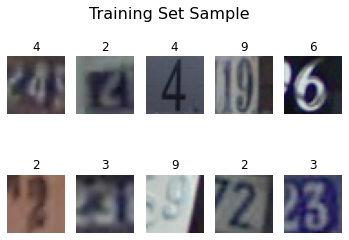

In [8]:
#plot some of the training data 
fig, axs = plt.subplots(2, 5)
fig.suptitle('Training Set Sample', fontsize=16)
for i, j in zip((rand_ytrain), axs.flat):
  j.imshow(x_train[i])
  j.set_title(y_train[i])
  #dont show axis 
  j.axis('off')
  


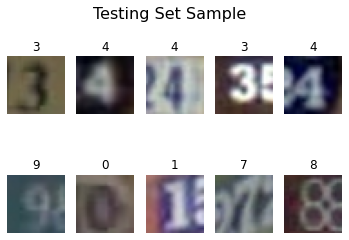

In [9]:
#plot some of the testing data 
fig, axs = plt.subplots(2, 5)
fig.suptitle('Testing Set Sample', fontsize=16)
for i, j in zip((rand_ytest), axs.flat):
  j.imshow(x_test[i])
  j.set_title(y_test[i])
  #dont show axis 
  j.axis('off')


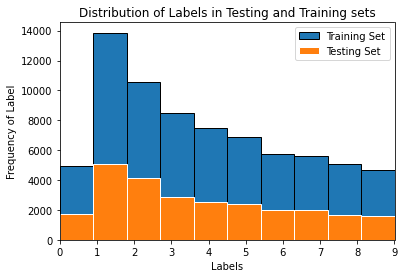

In [10]:

plt.hist(y_train, label="Training Set", edgecolor="black")
plt.hist(y_test, label="Testing Set", edgecolor="white")
plt.xlim(0,9)
plt.legend()
plt.title("Distribution of Labels in Testing and Training sets")
plt.xlabel("Labels")
plt.ylabel("Frequency of Label")
plt.show()


In [0]:
#building CNN with Keras
#https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5


In [11]:
#CNN requires one hot encoding which converts our categories to binary 

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


Using TensorFlow backend.


In [12]:
#building the model with default parameters using the previous link 
#also with help from https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/ 
#to fine tune parameters 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import Dense, Dropout, Activation, Flatten, Input, MaxPooling2D
#create model
model = Sequential()
#add model layers

model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Flatten())
#model.add(Dense(16))

model.add(Dense(10))



model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [0]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
#train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=35)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 73257 samples, validate on 26032 samples
Epoch 1/35





73257/73257 [==============================] - 20s 277us/step - loss: 9.7603 - acc: 0.1865 - val_loss: 10.2651 - val_acc: 0.1948
Epoch 2/35
73257/73257 [==============================] - 19s 264us/step - loss: 10.0415 - acc: 0.1874 - val_loss: 10.2651 - val_acc: 0.1948
Epoch 3/35
73257/73257 [==============================] - 20s 272us/step - loss: 10.0415 - acc: 0.1874 - val_loss: 10.2651 - val_acc: 0.1948
Epoch 4/35
73257/73257 [==============================] - 21s 280us/step - loss: 10.0415 - acc: 0.1874 - val_loss: 10.2651 - val_acc: 0.1948
Epoch 5/35
73257/73257 [==============================] - 20s 278us/step - loss: 10.0415 - acc: 0.1874 - val_loss: 10.2651 - val_acc: 0.1948
Epoch 6/35
73257/73257 [==============================] - 21s 281us/step - loss: 10.0415 - acc: 0.1874 - val_loss: 10.2651 - val_acc: 0.1948


KeyboardInterrupt: ignored

In [0]:
#from keras.backend import clear_session
#clear_session()

In [0]:

pred =  model.predict(x_test)
pred


In [15]:
import numpy as np
y_test[np.argmax(pred[0])]

NameError: ignored

In [16]:
#check out a random sample of 10 
import numpy as np
rand_pred = [random.randint(0, len(pred)) for i in range(10)]

rand_pred
#plot the randomized predictions 
fig, axs = plt.subplots(2, 5)
fig.suptitle('Predicted labels using Keras', fontsize=16)
for i, j in zip((rand_pred), axs.flat):
  j.imshow(x_test[i])
  j.set_title(np.argmax(pred[i]))
  #j.set_title(y_test[np.argmax(pred[i])], color = ('red' if (np.argmax(pred[i]))!=y_test[i] else 'green'))
  #dont show axis 
  j.axis('off')

NameError: ignored

In [0]:
#try another model for classification
#Create a MnB model 
from sklearn.naive_bayes import MultinomialNB
# Train the model using the training sets
mnb_model = MultinomialNB(alpha=.8)

In [0]:
#https://stackoverflow.com/questions/34972142/sklearn-logistic-regression-valueerror-found-array-with-dim-3-estimator-expec
#mnb requires data be in 2D, our data is 3D
nsamples, nx, ny, nz = x_train.shape
x_train_d2 = x_train.reshape((nsamples,nx*ny*nz))

nsamples_test, nx_test, ny_test, nz_test = x_test.shape
x_test_d2 =  x_test.reshape((nsamples_test,nx_test*ny_test*nz_test))


In [28]:
print(y_train.shape)
print(x_train_d2.shape)

(73257, 10)
(73257, 3072)


In [25]:
#train the model 
#len(x_train_d2)
mnb_model.fit(x_train_d2, y_train)

ValueError: ignored

In [20]:
mnb_pred = mnb_model.predict(x_test_d2)
mnb_pred

NotFittedError: ignored

In [21]:
#get accuracy metrics 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, mnb_pred)

NameError: ignored

In [0]:
#create a random forest
from sklearn.ensemble import RandomForestClassifier
# Train the model using the training sets
rf_model = RandomForestClassifier(criterion='entropy')

In [30]:
#fit the model
rf_model.fit(x_train_d2, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
rf_pred = rf_model.predict(x_test_d2)
rf_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
accuracy_score(y_test, rf_pred)


0.2593346650276583